In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import opendatasets as od

In [3]:
od.download(
    "https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Skipping, found downloaded files in ".\gtsrb-german-traffic-sign" (use force=True to force download)


In [4]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

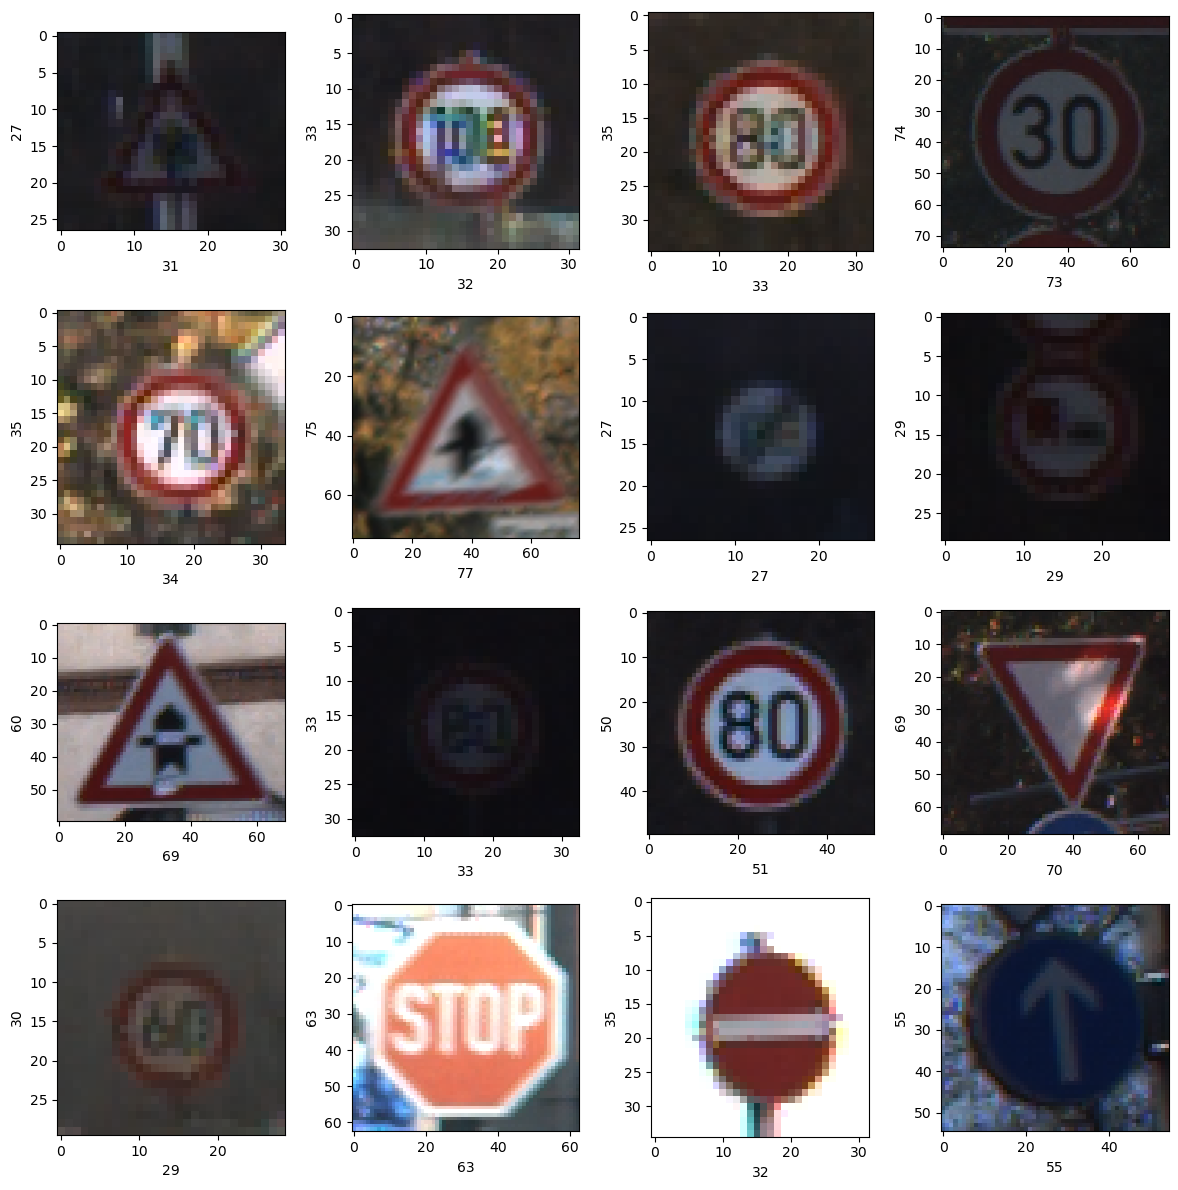

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "C:/Users/antho/Desktop/gtsrb-german-traffic-sign/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [6]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'gtsrb-german-traffic-sign/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [7]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [8]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'gtsrb-german-traffic-sign/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [9]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [10]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [11]:
images.shape

(39209, 50, 50, 3)

In [12]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [13]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [14]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [15]:
model= Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = x_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 43 , activation = 'softmax'))
model.compile(optimizer = "rmsprop" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 64)       2

In [16]:
#Augmenting the data and training the model
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")


In [17]:
history= model.fit(aug.flow(x_train, y_train, batch_size = 128),epochs = 10,  validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 122s - loss: 2.0791 - accuracy: 0.4104 - val_loss: 3.5395 - val_accuracy: 0.1586 - 122s/epoch - 498ms/step
Epoch 2/10
246/246 - 116s - loss: 0.4945 - accuracy: 0.8389 - val_loss: 0.6967 - val_accuracy: 0.7978 - 116s/epoch - 470ms/step
Epoch 3/10
246/246 - 98s - loss: 0.2031 - accuracy: 0.9358 - val_loss: 0.1010 - val_accuracy: 0.9670 - 98s/epoch - 396ms/step
Epoch 4/10
246/246 - 73s - loss: 0.1316 - accuracy: 0.9583 - val_loss: 0.0625 - val_accuracy: 0.9819 - 73s/epoch - 295ms/step
Epoch 5/10
246/246 - 79s - loss: 0.0956 - accuracy: 0.9696 - val_loss: 0.0330 - val_accuracy: 0.9890 - 79s/epoch - 321ms/step
Epoch 6/10
246/246 - 78s - loss: 0.0809 - accuracy: 0.9751 - val_loss: 0.0292 - val_accuracy: 0.9918 - 78s/epoch - 316ms/step
Epoch 7/10
246/246 - 79s - loss: 0.0711 - accuracy: 0.9789 - val_loss: 0.0574 - val_accuracy: 0.9834 - 79s/epoch - 323ms/step
Epoch 8/10
246/246 - 72s - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.0216 - val_accuracy: 0.9939 - 72s/epoch -

<AxesSubplot: >

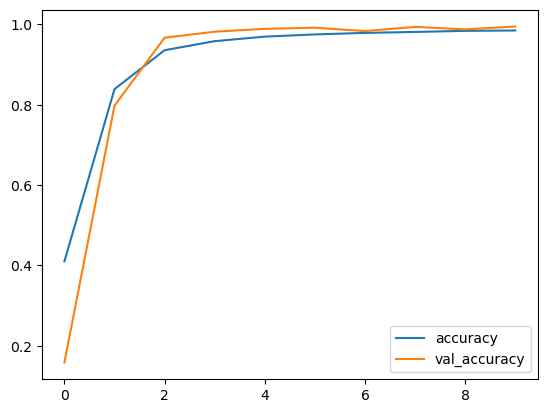

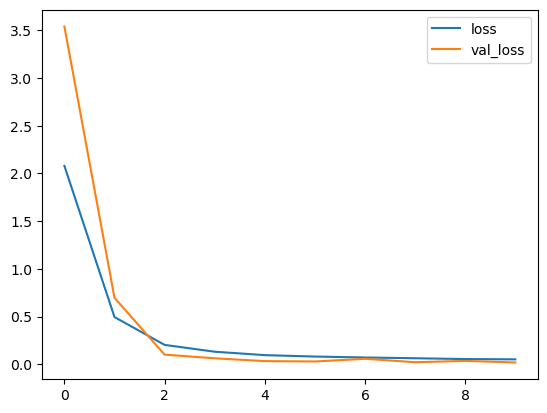

In [18]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [19]:
test_path = 'gtsrb-german-traffic-sign/Test'


In [20]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [22]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [44]:
test = pd.read_csv('gtsrb-german-traffic-sign/Test.csv')
labels = test['ClassId'].values
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [46]:
x_test.shape

(12630, 8)

In [47]:
y_pred = model.predict(test_images);
y_pred

395/395 [==============================] - 6s 15ms/step


array([[1.46362396e-17, 6.59473398e-13, 2.17869576e-19, ...,
        3.66664350e-18, 5.00514045e-16, 1.20717574e-12],
       [1.20416597e-15, 1.00000000e+00, 6.56506162e-18, ...,
        8.45591194e-28, 4.02142119e-31, 0.00000000e+00],
       [0.00000000e+00, 6.99261745e-37, 1.67997328e-26, ...,
        1.78295076e-23, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.01047195e-09, 1.25870592e-05, 6.26271940e-05, ...,
        1.21873072e-05, 5.34317344e-02, 4.09416556e-02],
       [2.01193982e-17, 5.69986384e-11, 6.44816791e-15, ...,
        6.40828608e-18, 6.99177971e-25, 1.39440859e-14],
       [5.24755759e-26, 1.01276593e-20, 6.22518313e-13, ...,
        1.05113775e-23, 5.43587814e-20, 9.80568433e-16]], dtype=float32)

In [48]:
y_pred=np.argmax(y_pred, axis=1)

In [50]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, y_pred)*100)

Test Data accuracy:  96.42913697545526


In [51]:
# Storing all lables
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

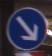

In [52]:
# Visualize test image
img = Image.open(test_path + '/00005.png')
img

In [54]:
# Original label
print("Original label : ",all_labels[labels[5]])

Original label :  Keep right


In [55]:
# Predicted label
print("Predicted label : ",all_labels[y_pred[5]])

Predicted label :  Keep right


com= confusion_matrix(y_test,y_pred)
com

<AxesSubplot: >

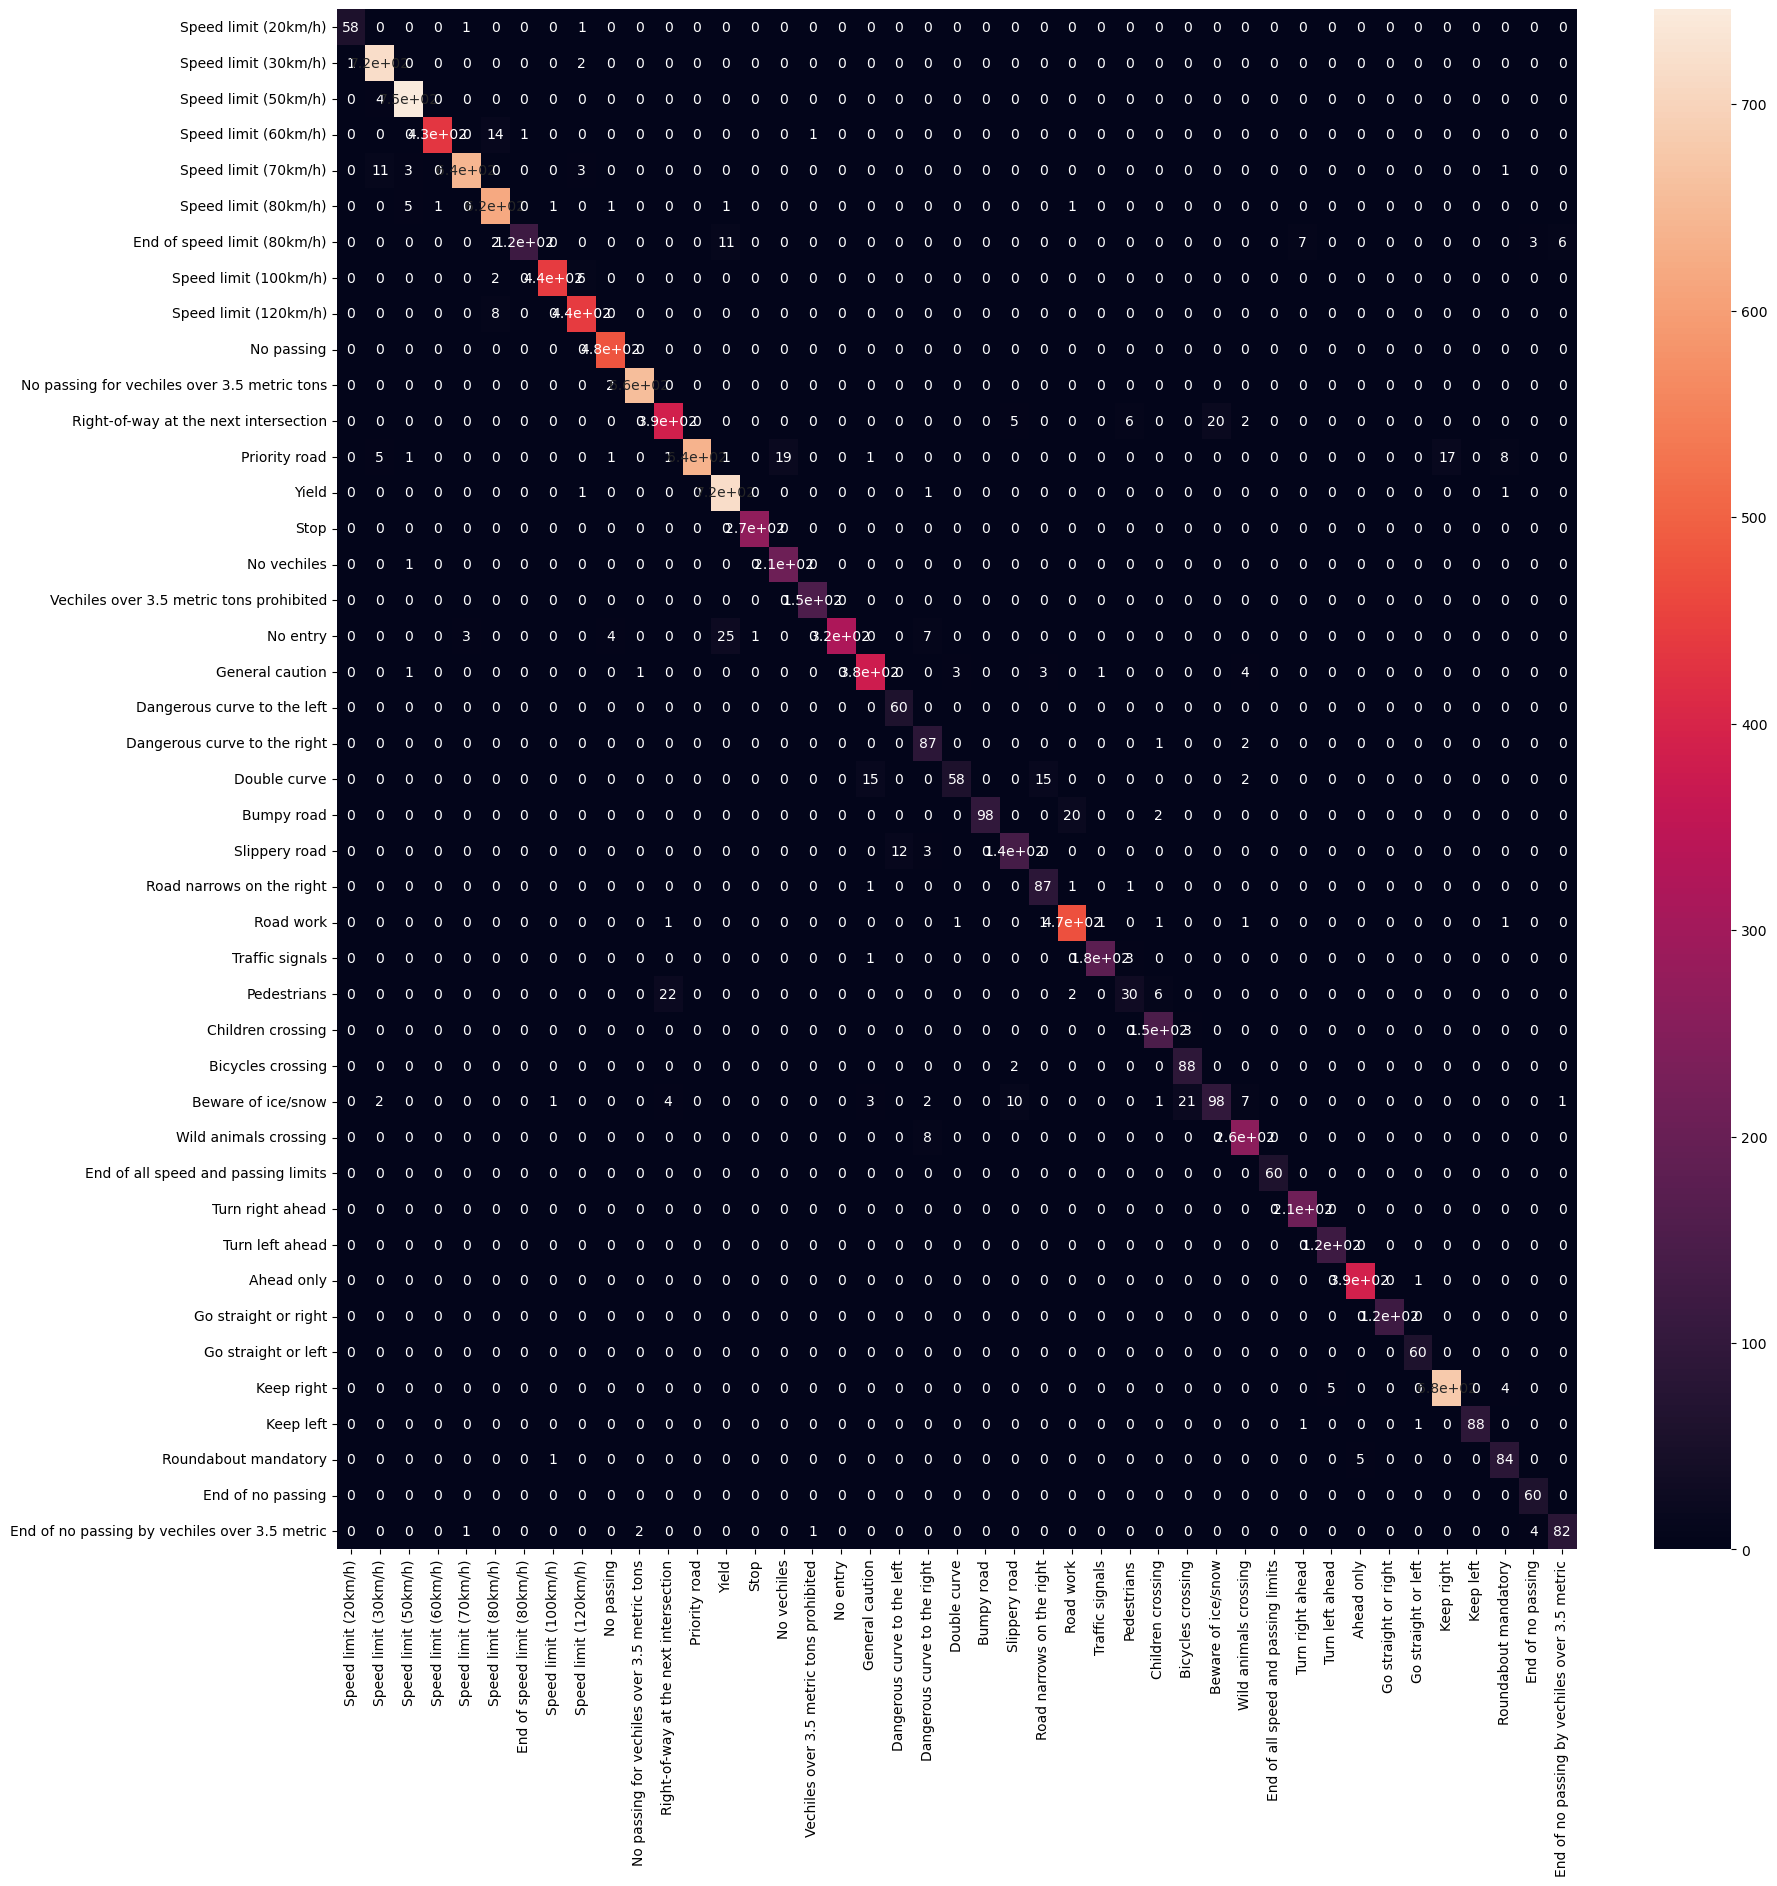

In [57]:
cf = confusion_matrix(labels, y_pred)
import seaborn as sns
df_cm = pd.DataFrame(cf, index = all_labels,  columns = all_labels)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)



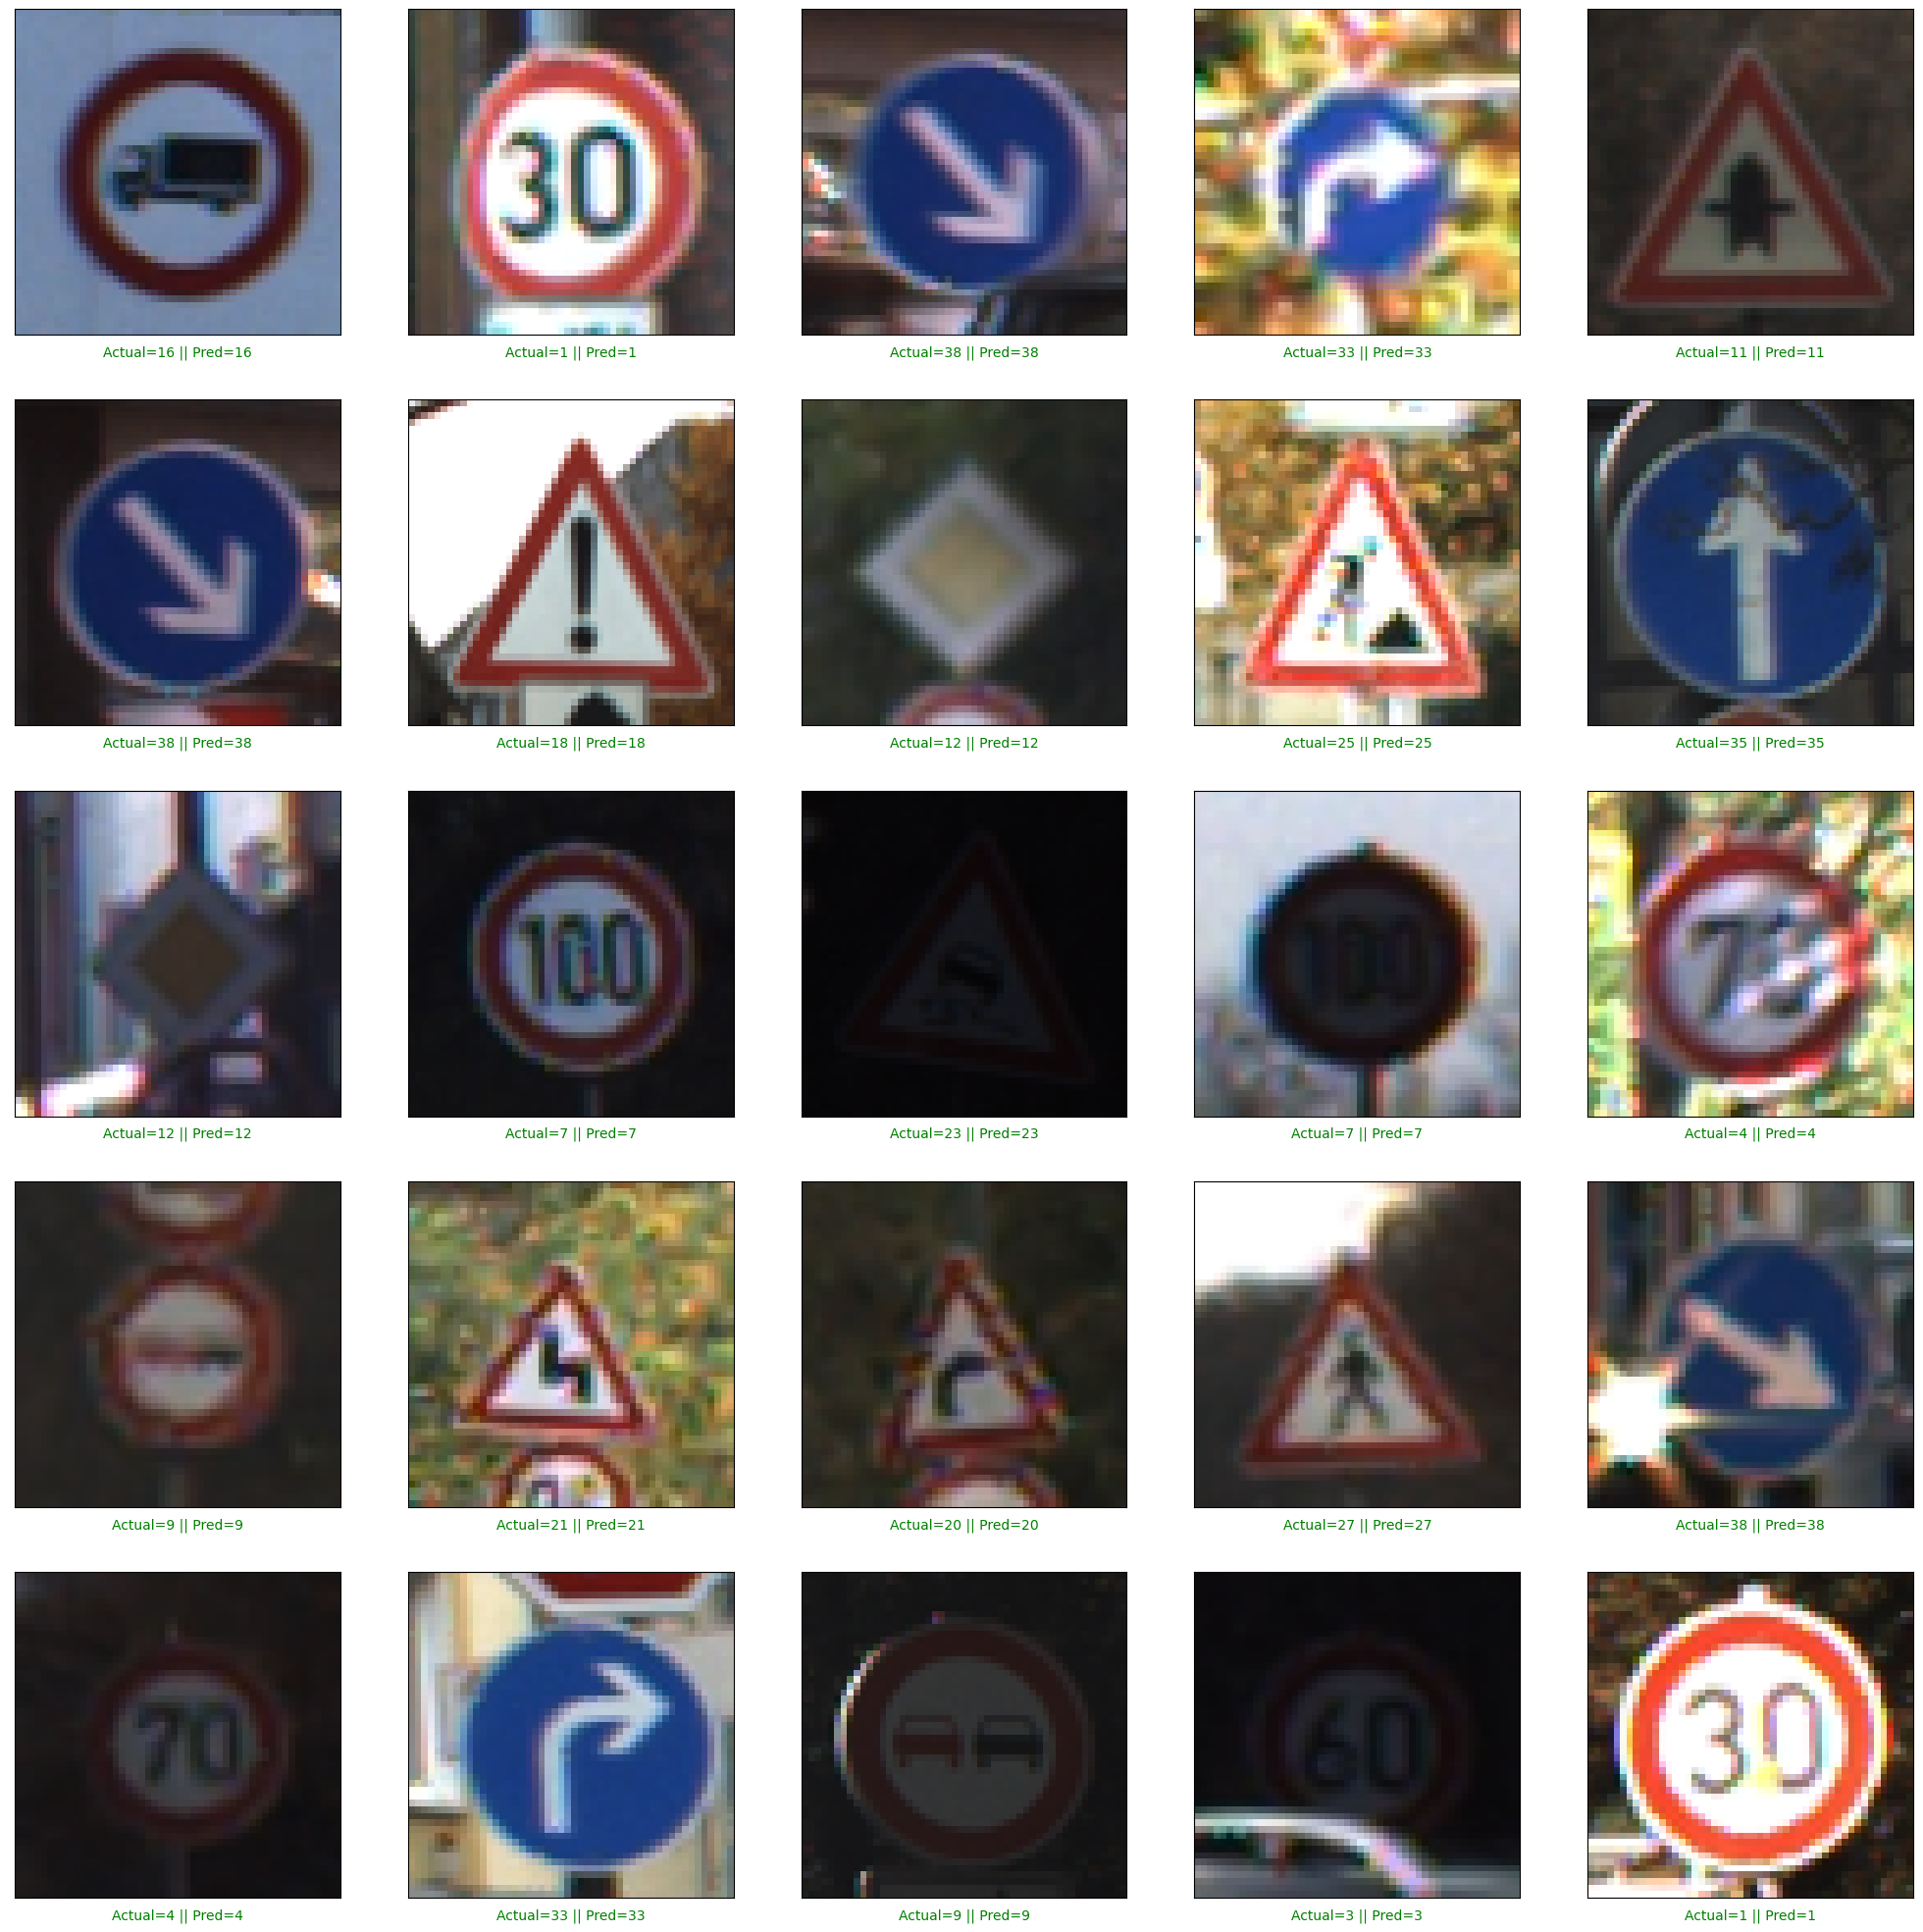

In [65]:


#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(test_images[start_index + i])
plt.show()

